<a href="https://colab.research.google.com/github/TAUforPython/denoising/blob/main/%D0%B4%D0%B8%D1%81%D0%BA%D1%80%D0%B5%D1%82%D0%BD%D1%8B%D0%B9_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D0%9A%D0%B0%D0%BB%D0%BC%D0%B0%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Источники:

https://courses.cs.washington.edu/courses/cse571/03wi/notes/welch-bishop-tutorial.pdf

https://habr.com/ru/articles/166693/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
# intial parameters
n_iter = 60
sz = (n_iter,) # size of array

In [ ]:
# kalman filter for ABCD system
xOpt = np.zeros(sz)
x_clean = np.zeros(sz)
x = np.zeros(sz)
y = np.zeros(sz)
Kkalman = np.zeros(sz)
eOpt = np.zeros(sz)
P = np.zeros(sz)
sigmaPsi = 1.01
sigmaEta = 1.01

eOpt[0] = sigmaEta
P[0] = sigmaEta

A = -0.5
B = 0.2
C = 1

  # x = a * x + b * u + Psi
  # y = c * x + Eta

for k in range(1, n_iter):
  u = np.sin(k*np.pi*2/20)
  x_clean [k]= A * x_clean[k-1] + B * u
  x[k] = A * x[k-1] + B * u + np.random.normal(0,sigmaPsi)
  y[k] = C * x[k] + np.random.normal(0,sigmaEta)

  #eOpt[k] = ((sigmaEta**2)*((eOpt[k-1])**2+sigmaPsi**2)/(sigmaEta**2+(eOpt[k-1])**2+sigmaPsi**2))**(0.5)
  #Kkalman[k] = (eOpt[k])**2/sigmaEta**2
  P[k] = A * P[k-1] * A + sigmaEta
  Kkalman[k] = P[k]*C / (C * P[k] * C + sigmaPsi)
  P[k] = (1 - Kkalman[k]*C) * P[k]

  xOpt[k] = (A * x[k-1] + B * u) * (1 - Kkalman[k]) + Kkalman[k] * (y[k])

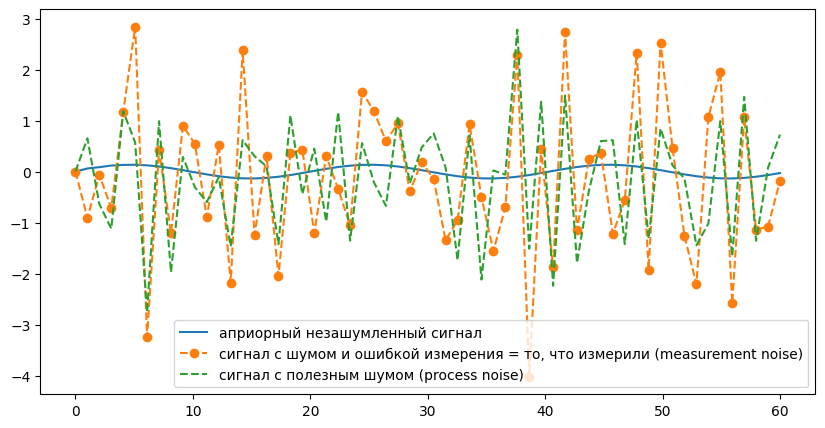

In [ ]:
t = np.linspace(0,sz,n_iter)
plt.plot(t, x_clean, label='априорный незашумленный сигнал')
plt.plot(t, y, 'o--', label = 'сигнал с шумом и ошибкой измерения = то, что измерили (measurement noise)')
plt.plot(t, x, '--', label = 'сигнал с полезным шумом (process noise)')
plt.legend()
plt.show()

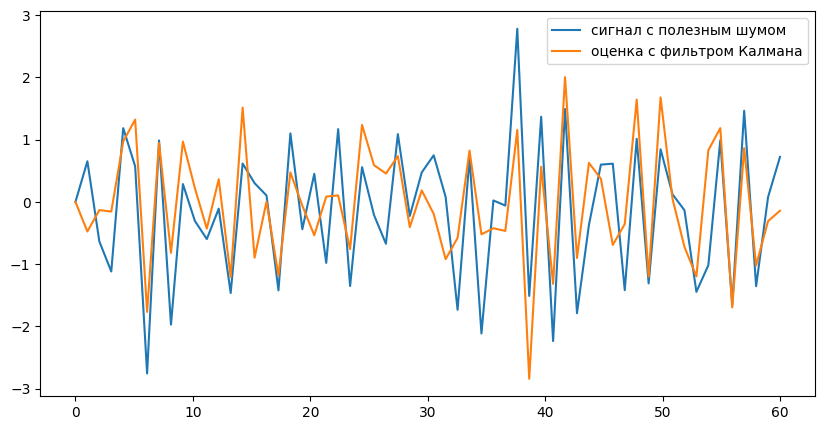

In [ ]:
plt.plot(t, x, label = 'сигнал с полезным шумом')
plt.plot(t, xOpt, label = 'оценка с фильтром Калмана')
plt.legend()
plt.show()

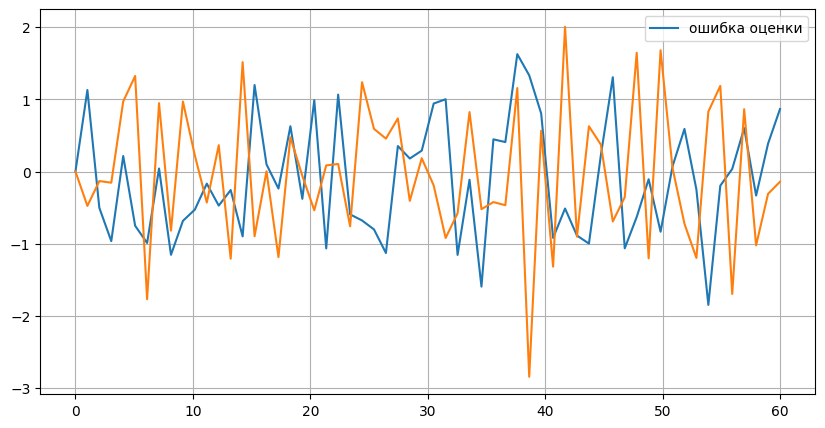

In [ ]:
plt.plot(t, (x - xOpt), label = 'ошибка оценки')
plt.plot(t, xOpt)
plt.legend()
plt.grid()
plt.show()

Text(0.5, 0, 'такт дискретной системы')

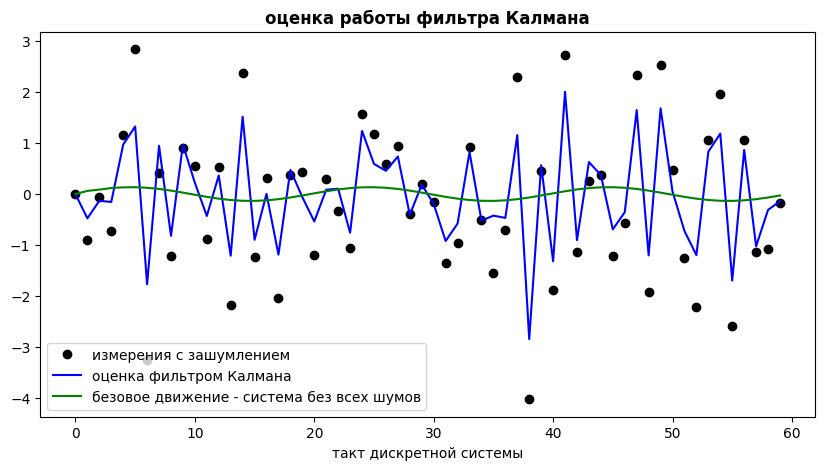

In [ ]:
plt.figure()
plt.plot(y,'ko',label='измерения с зашумлением')
plt.plot(xOpt,'b-',label='оценка фильтром Калмана')
plt.plot(x_clean, color='g',label='безовое движение - система без всех шумов')
plt.legend()
plt.title('оценка работы фильтра Калмана', fontweight='bold')
plt.xlabel('такт дискретной системы')


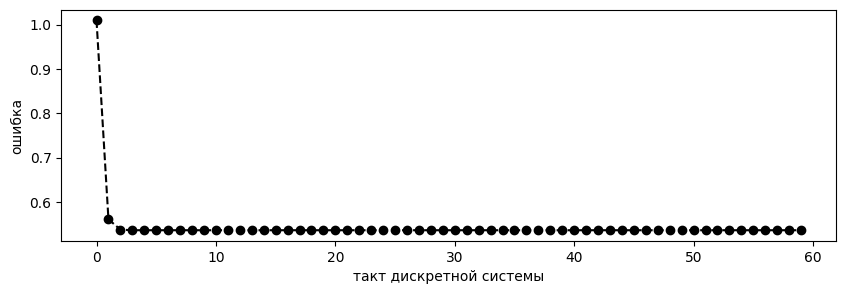

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(P,'ko--',label='ошибка оценки фильтром Калмана')
plt.xlabel('такт дискретной системы')
plt.ylabel('ошибка')
plt.show()